In [13]:
# all libraries required for the entire EDA

from requests import get
import requests
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
import pandas as pd
from sklearn.metrics import mean_squared_error

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(color_codes=True)
import fitter
from fitter import Fitter


In [3]:
db = requests.get('https://github.com/TinkerFrank/healthapp/raw/main/Build%201/db.sqlite3')
open('web.db', 'wb').write(db.content)

dbConnection = sqlite3.connect('web.db')

df = pd.read_sql_query(f"SELECT * FROM {'df4'}", dbConnection )
df.head()

,index,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
0,0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [4]:
feature = 'mass'

<Axes: xlabel='mass', ylabel='Count'>

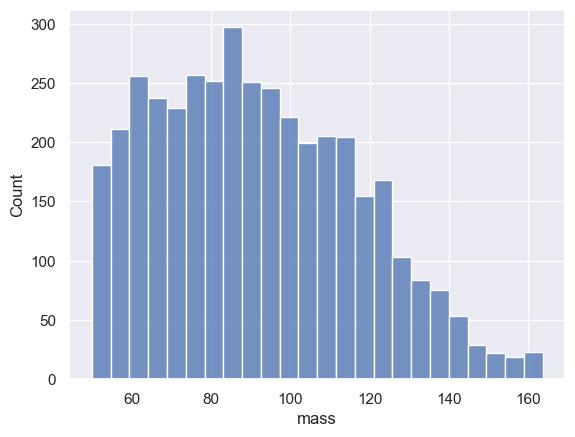

In [5]:
sns.histplot(df[feature])

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pearson3,0.000605,1018.749785,-62407.641998,0.039166,0.043142,7.190533e-07
chi2,0.000605,1018.750343,-62407.589666,0.039166,0.043144,7.181476e-07
f,0.000612,1027.311325,-62352.913865,0.039197,0.040169,5.174437e-06
lognorm,0.000639,1023.785131,-62191.362171,0.040895,0.041420,2.294029e-06
t,0.000747,1039.987590,-61571.338699,0.047714,0.049247,8.031518e-09


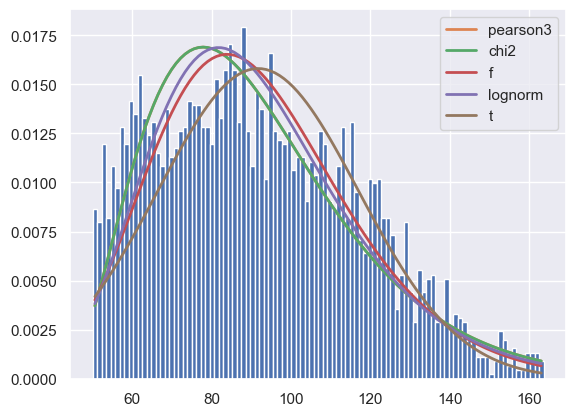

In [6]:
featurenp = np.array(df[feature])
f = Fitter(featurenp, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

A chi-squared distribution constructed by squaring a single standard normal distribution is said to have 1 degree of freedom <br>
https://en.wikipedia.org/wiki/Chi-squared_distribution

In [8]:
import math
df[feature] = df[feature].apply(lambda x: math.sqrt(x))

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.221009,411.868593,-38949.408766,0.039115,0.040289,4.790797e-06
t,0.221020,413.870969,-38940.933025,0.039117,0.040291,4.786706e-06
lognorm,0.227235,409.678571,-38830.644821,0.039862,0.040325,4.681339e-06
pearson3,0.230358,408.160539,-38776.360911,0.040285,0.041468,2.223331e-06
f,0.235074,409.832159,-38687.469755,0.041037,0.042721,9.595158e-07


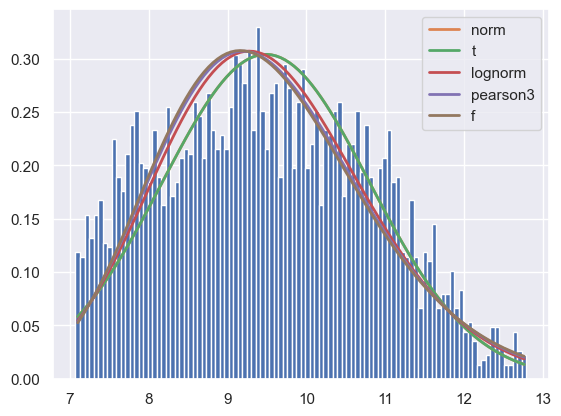

In [11]:
featurenp = np.array(df[feature])
f = Fitter(featurenp, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

Taking the square root of gives us mass normaly distributed ✅

<h3>Lets see the effect on the regression model accuracy</h3>

In [24]:
#split the data in train and test sets with agreed 0.2 size and 42 as seed for the random state
train, test = train_test_split(df, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

#fit the model
regr = linear_model.LinearRegression()
regr.fit(X, y) 

#R-squared model score
score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
rsquaredscore = score
print('Rsquared:', score,'an improvement of:',round(100*((score/0.982103117480551)-1),2),'% compared to DF4')

#Root-Mean-Squared-Error (RMSE)
p_test = regr.predict(test.drop(columns=['lifespan']))
mse = mean_squared_error(test.lifespan, p_test)
rmse = (math.sqrt(mse))
print('RMSE:', score)


Rsquared: 0.9826184086652832 an improvement of: 0.05 %
RMSE: 0.9826184086652832
